<a href="https://colab.research.google.com/github/GuilhermeVCCdaSilva/ProjetoBD/blob/main/ProjetoBigData_GuilhermeSilvaMarineFournieGon%C3%A7aloAlves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.estbarreiro.ips.pt/Content/images/logo-ESTB.png" align="right" alt="EsT Logo circle logo" style="height: 200px; width:300px;"/>

# Projeto Final Big Data 
* __Guilherme Silva__
* __Marine Emilie Fournier__
* __Gonçalo Alves__

In [1]:
# Installing required packages
!pip install pyspark
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Creating a SparkSession
Para se trabalhar com dados no Spark, é essencial criar uma SparkSession, este passo é fundamental e o primeiro a ser realizado. Ela é responsável por gerenciar a configuração do Spark, criar RDDs (Resilient Distributed Datasets) e DataFrames, registar tabelas temporárias e gerenciar os recursos do cluster utilizados.

A SparkSession é o ponto de partida para trabalhar com dados estruturados e relacionais no Spark SQL, o módulo do Spark que fornece suporte para essa funcionalidade. Ele permite que você execute consultas SQL, manipule DataFrames e extraia metadados. Ele também oferece acesso às bibliotecas de processamento de fluxo de dados (como o DataFrame API e o SQL) e às bibliotecas de aprendizado de máquina (como o MLlib) do Spark.

A SparkSession (criada usando SparkSession.builder) é uma classe fundamental para trabalhar com dados no Spark, é através dela que é possível configurar e gerenciar a sessão, estabelecer conexões com o cluster, definir opções de configuração e gerenciar recursos como o número de núcleos para usar e a quantidade de memória. É a porta de entrada para trabalhar com dados estruturados e relacionais no Spark SQL.

A configuração ".config("spark.memory.offHeap.enabled")" permite habilitar o uso de memória fora da heap (off-heap). Quando essa configuração é definida como "true", o Spark pode usar memória fora do heap do JVM para armazenar os dados e realizar operações. Isso permite que o Spark armazene e execute operações com mais dados, o que pode melhorar o desempenho quando a memória disponível dentro da heap não é suficiente.

A configuração ".config("spark.memory.offHeap.size","10g")" permite definir a quantidade de memória fora do heap (off-heap) disponível para o Spark usar. Neste caso, o valor "10g" indica que o Spark pode usar até 10 gigabytes de memória fora do heap. Esse valor pode ser ajustado de acordo com o tamanho dos dados e as necessidades do seu aplicativo para garantir o melhor desempenho possível.

In [2]:
from pyspark.sql import SparkSession
import findspark

findspark.init()

spark = SparkSession.builder.appName("Pyspark Tutorial")\
                    .config("spark.memory.offHeap.enabled","true")\
                    .config("spark.memory.offHeap.size","10g")\
                    .getOrCreate()
spark                    

#Carregamento dos dados do DataSet:
Link para o DataSet: https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work

In [3]:
!curl https://raw.githubusercontent.com/GuilhermeVCCdaSilva/ProjetoBD/main/Absenteeism_at_work.csv >> Absenteeism_at_work.csv
df = spark.read.csv('Absenteeism_at_work.csv',header=True,sep=";")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 45232  100 45232    0     0   613k      0 --:--:-- --:--:-- --:--:--  613k



#"Data Visualization" e Análise

Primeiramente vamos tamanho e o tipo de dados do nosso Dataset.

Este passoera mais simples ser executado através do método shape, mas como o não é suportado pelo PySpark DataFrame, no entanto, podemos contar o número de linhas e colunas usando o método count() e verificar o esquema (colunas e tipos de dados) do DataFrame usando o método printSchema().


In [4]:
print("Numero de Linhas:", df.count())
print("Numero de Colunas:", len(df.columns))
print("Esquema do DataFrame: ")
df.printSchema()

Numero de Linhas: 8891
Numero de Colunas: 21
Esquema do DataFrame: 
root
 |-- ID: string (nullable = true)
 |-- Reason for absence: string (nullable = true)
 |-- Month of absence: string (nullable = true)
 |-- Day of the week: string (nullable = true)
 |-- Seasons: string (nullable = true)
 |-- Transportation expense: string (nullable = true)
 |-- Distance from Residence to Work: string (nullable = true)
 |-- Service time: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Work load Average/day : string (nullable = true)
 |-- Hit target: string (nullable = true)
 |-- Disciplinary failure: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Son: string (nullable = true)
 |-- Social drinker: string (nullable = true)
 |-- Social smoker: string (nullable = true)
 |-- Pet: string (nullable = true)
 |-- Weight: string (nullable = true)
 |-- Height: string (nullable = true)
 |-- Body mass index: string (nullable = true)
 |-- Absenteeism time in hours: string (

In [5]:
df.show(10)

+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
| ID|Reason for absence|Month of absence|Day of the week|Seasons|Transportation expense|Distance from Residence to Work|Service time|Age|Work load Average/day |Hit target|Disciplinary failure|Education|Son|Social drinker|Social smoker|Pet|Weight|Height|Body mass index|Absenteeism time in hours|
+---+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
| 11|                26|               7|              3|      1|                   289|                        

#Este DataSet contém várias colunas tais como:

1.  ID: Identificador único para cada registo.
2.    Razão para a ausência: Razão para a ausência do funcionário no trabalho.
3.    Mês da ausência: O mês em que o funcionário estava ausente.
4.    Dia da semana: O dia da semana em que o funcionário estava ausente.
5.    Estações: A estação do ano em que o funcionário estava ausente.
6.    Despesas de transporte: As despesas de transporte incorridas pelo funcionário ao viajar para o trabalho.
7.    Distância da residência para o trabalho: A distância entre a residência do funcionário e o local de trabalho.
8.    Tempo de serviço: O período de tempo em que o funcionário está a trabalhar na empresa.
9.    Idade: A idade do funcionário.
10.    Carga de trabalho média/dia: A carga de trabalho média do funcionário por dia.
11.    Alvo atingido: Se o funcionário atingiu ou não o alvo
12.    Falha disciplinar: Se o funcionário cometeu alguma falha disciplinar ou não.
12.    Educação: O nível de educação do funcionário.
14.    Filhos: O número de filhos que o funcionário tem.
15.    Bebedor social: Se o funcionário bebe socialmente ou não.
16.    Fumador social: Se o funcionário fuma socialmente ou não.
17.    Animal de estimação: Se o funcionário tem algum animal de estimação ou não.
18.    Peso: O peso do funcionário.
19.    Altura: A altura do funcionário.
20.    Índice de massa corporal: O índice de massa corporal do funcionário.
21.    Tempo de ausência em horas: O número de horas que o funcionário ficou ausente.

In [6]:
df = df.drop("id")

In [7]:
df.show(10)

+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
|Reason for absence|Month of absence|Day of the week|Seasons|Transportation expense|Distance from Residence to Work|Service time|Age|Work load Average/day |Hit target|Disciplinary failure|Education|Son|Social drinker|Social smoker|Pet|Weight|Height|Body mass index|Absenteeism time in hours|
+------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+---+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
|                26|               7|              3|      1|                   289|                             36|        

- Check the number of missing values in each column

In [8]:
# create a list to store the number of missing values in each column
missing_values = []

# iterate through the columns in the dataset
for col in df.columns:
    missing_values.append((col, df.filter(df[col].isNull()).count()))

# print the missing values
for col, val in missing_values:
    if val == 0:
        print("{} : Nunhum missing values encontrado".format(col))
    else:
        print("{} : {} missing values".format(col, val))

Reason for absence : Nunhum missing values encontrado
Month of absence : Nunhum missing values encontrado
Day of the week : Nunhum missing values encontrado
Seasons : Nunhum missing values encontrado
Transportation expense : Nunhum missing values encontrado
Distance from Residence to Work : Nunhum missing values encontrado
Service time : Nunhum missing values encontrado
Age : Nunhum missing values encontrado
Work load Average/day  : Nunhum missing values encontrado
Hit target : Nunhum missing values encontrado
Disciplinary failure : Nunhum missing values encontrado
Education : Nunhum missing values encontrado
Son : Nunhum missing values encontrado
Social drinker : Nunhum missing values encontrado
Social smoker : Nunhum missing values encontrado
Pet : Nunhum missing values encontrado
Weight : Nunhum missing values encontrado
Height : Nunhum missing values encontrado
Body mass index : Nunhum missing values encontrado
Absenteeism time in hours : Nunhum missing values encontrado


- check the data types of the columns

In [9]:
df.dtypes

[('Reason for absence', 'string'),
 ('Month of absence', 'string'),
 ('Day of the week', 'string'),
 ('Seasons', 'string'),
 ('Transportation expense', 'string'),
 ('Distance from Residence to Work', 'string'),
 ('Service time', 'string'),
 ('Age', 'string'),
 ('Work load Average/day ', 'string'),
 ('Hit target', 'string'),
 ('Disciplinary failure', 'string'),
 ('Education', 'string'),
 ('Son', 'string'),
 ('Social drinker', 'string'),
 ('Social smoker', 'string'),
 ('Pet', 'string'),
 ('Weight', 'string'),
 ('Height', 'string'),
 ('Body mass index', 'string'),
 ('Absenteeism time in hours', 'string')]

- Convert data type string to double

In [10]:
from pyspark.sql.functions import col
for column in df.columns:
    df = df.withColumn(column, col(column).cast("double"))

In [11]:
df.dtypes

[('Reason for absence', 'double'),
 ('Month of absence', 'double'),
 ('Day of the week', 'double'),
 ('Seasons', 'double'),
 ('Transportation expense', 'double'),
 ('Distance from Residence to Work', 'double'),
 ('Service time', 'double'),
 ('Age', 'double'),
 ('Work load Average/day ', 'double'),
 ('Hit target', 'double'),
 ('Disciplinary failure', 'double'),
 ('Education', 'double'),
 ('Son', 'double'),
 ('Social drinker', 'double'),
 ('Social smoker', 'double'),
 ('Pet', 'double'),
 ('Weight', 'double'),
 ('Height', 'double'),
 ('Body mass index', 'double'),
 ('Absenteeism time in hours', 'double')]

In [12]:
from pyspark.sql.functions import when
from pyspark.sql.functions import array
from pyspark.sql.functions import udf
# Create the mapping dictionary
mapping_dict = {
    0: "CID - Patient follow-up",
    1: "CID - Medical consultation",
    2: "CID - Blood donation",
    3: "CID - Laboratory examination",
    4: "CID - Unjustified absence",
    5: "CID - Physiotherapy",
    6: "CID - Dental consultation",
    7: "Certain infectious and parasitic diseases",
    8: "Neoplasms",
    9: "Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism",
    10: "Endocrine, nutritional and metabolic diseases",
    11: "Mental and behavioural disorders",
    12: "Diseases of the nervous system",
    13: "Diseases of the eye and adnexa",
    14: "Diseases of the ear and mastoid process",
    15: "Diseases of the circulatory system",
    16: "Diseases of the respiratory system",
    17: "Diseases of the digestive system",
    18: "Diseases of the skin and subcutaneous tissue",
    19: "Diseases of the musculoskeletal system and connective tissue",
    20: "Diseases of the genitourinary system",
    21: "Pregnancy, childbirth and the puerperium",
    22: "Certain conditions originating in the perinatal period",
    23: "Congenital malformations, deformations and chromosomal abnormalities",
    24: "Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified",
    25: "Injury, poisoning and certain other consequences of external causes",
    26: "External causes of morbidity and mortality",
    27: "Factors influencing health status and contact with health services"
}

# Create the user-defined function
map_reason = udf(lambda x: mapping_dict.get(x))

# Apply the user-defined function to the dataframe
df = df.withColumn("Reason for absence", map_reason(col("Reason for absence")))

In [13]:
df.select("Reason for absence").show()

+--------------------+
|  Reason for absence|
+--------------------+
|External causes o...|
|CID - Patient fol...|
|Congenital malfor...|
|Certain infectiou...|
|Congenital malfor...|
|Congenital malfor...|
|Certain condition...|
|Congenital malfor...|
|Diseases of the m...|
|Certain condition...|
|CID - Medical con...|
|CID - Medical con...|
|Mental and behavi...|
|Mental and behavi...|
|Congenital malfor...|
|Diseases of the e...|
|Congenital malfor...|
|Pregnancy, childb...|
|Mental and behavi...|
|Congenital malfor...|
+--------------------+
only showing top 20 rows



In [14]:
df.show(10)

+--------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+----+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
|  Reason for absence|Month of absence|Day of the week|Seasons|Transportation expense|Distance from Residence to Work|Service time| Age|Work load Average/day |Hit target|Disciplinary failure|Education|Son|Social drinker|Social smoker|Pet|Weight|Height|Body mass index|Absenteeism time in hours|
+--------------------+----------------+---------------+-------+----------------------+-------------------------------+------------+----+----------------------+----------+--------------------+---------+---+--------------+-------------+---+------+------+---------------+-------------------------+
|External causes o...|             7.0|            3.0|    1.0|                 289.0|                           36

In [15]:
df.dtypes

[('Reason for absence', 'string'),
 ('Month of absence', 'double'),
 ('Day of the week', 'double'),
 ('Seasons', 'double'),
 ('Transportation expense', 'double'),
 ('Distance from Residence to Work', 'double'),
 ('Service time', 'double'),
 ('Age', 'double'),
 ('Work load Average/day ', 'double'),
 ('Hit target', 'double'),
 ('Disciplinary failure', 'double'),
 ('Education', 'double'),
 ('Son', 'double'),
 ('Social drinker', 'double'),
 ('Social smoker', 'double'),
 ('Pet', 'double'),
 ('Weight', 'double'),
 ('Height', 'double'),
 ('Body mass index', 'double'),
 ('Absenteeism time in hours', 'double')]

- Check the statistics of numerical columns

In [16]:
df.describe().toPandas()

,summary,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,count,7536,8880,8880,8880,8880,8880,8880,8880,8880,...,8880,8880,8880,8880,8880,8880,8880,8880,8880,8880
1,mean,None,6.324324324324325,3.9148648648648647,2.5445945945945945,221.32972972972973,29.63108108108108,12.554054054054054,36.45,271.49023513513623,...,0.05405405405405406,1.2918918918918918,1.018918918918919,0.5675675675675675,0.07297297297297298,0.745945945945946,79.03513513513514,172.11486486486487,26.677027027027027,6.924324324324324
2,stddev,None,3.434157701670074,1.4207937958957617,1.1111421350574802,66.91073756575858,14.827595101238542,4.382156403699725,6.474758008724303,39.03391456474897,...,0.22613706479702606,0.6728208822986927,1.0978083615736531,0.49544148590935516,0.2601067801024113,1.3174414574941555,12.875227669312936,6.031255059984224,4.282796823703481,13.322737799995776
3,min,CID - Blood donation,0.0,2.0,1.0,118.0,5.0,1.0,27.0,205.917,...,0.0,1.0,0.0,0.0,0.0,0.0,56.0,163.0,19.0,0.0
4,max,"Symptoms, signs and abnormal clinical and labo...",12.0,6.0,4.0,388.0,52.0,29.0,58.0,378.884,...,1.0,4.0,4.0,1.0,1.0,8.0,108.0,196.0,38.0,120.0


- Check the correlation between columns

In [17]:
corr = df.stat.corr("Month of absence", "Transportation expense")
print(corr)

0.14378858920626247


<ipython-input-20-946569c96630>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))


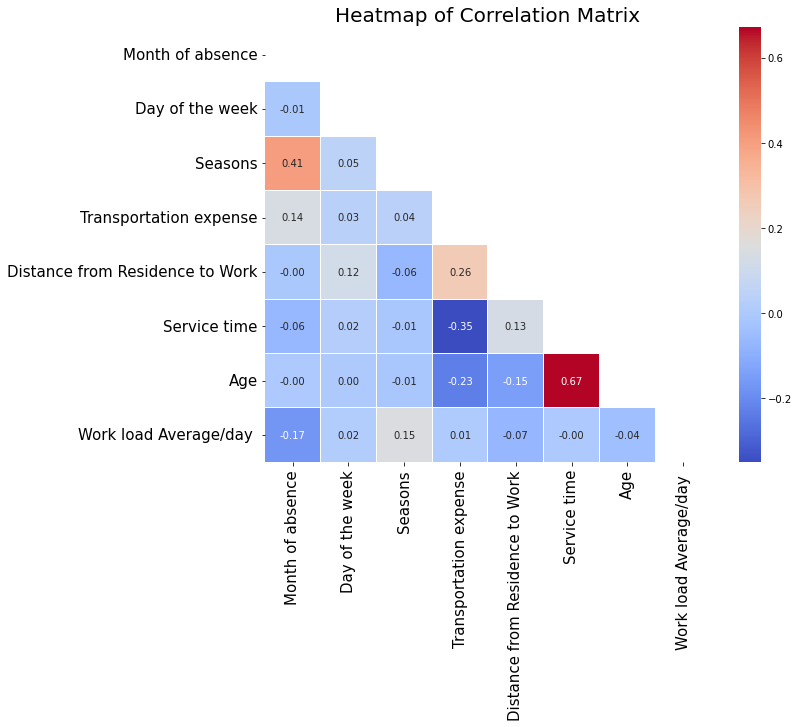

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

num_cols = [c for c in df.columns if df.select(c).dtypes[0][1] == 'double'][:8]
corr_matrix = df.select(num_cols).toPandas().corr()

plt.figure(figsize=(10, 8))
plt.title("Heatmap of Correlation Matrix", fontsize=20)

mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.05, linecolor='white', mask=mask)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

TypeError: ignored

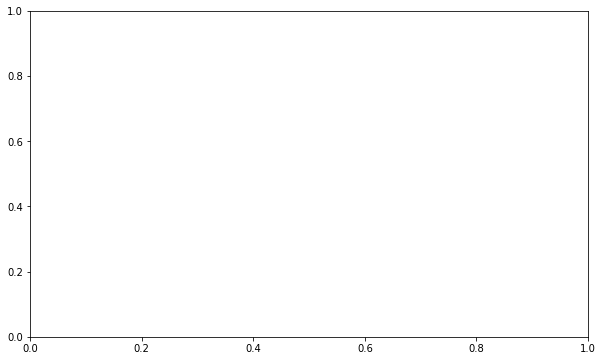

In [21]:
import matplotlib.pyplot as plt

# Count the frequency of each category in "Reason for absence" column
reason_counts = df.groupBy("Reason for absence").count().toPandas()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(reason_counts["Reason for absence"], reason_counts["count"])
plt.xlabel("Reason for absence")
plt.ylabel("Frequency")
plt.title("Frequency of Reasons for Absence")
plt.show()

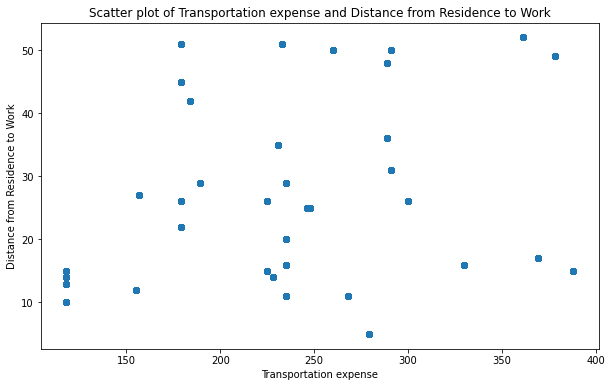

In [22]:
import matplotlib.pyplot as plt

# Extract the columns "Transportation expense" and "Distance from Residence to Work"
x = df.select("Transportation expense").toPandas()
y = df.select("Distance from Residence to Work").toPandas()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.xlabel("Transportation expense")
plt.ylabel("Distance from Residence to Work")
plt.title("Scatter plot of Transportation expense and Distance from Residence to Work")
plt.show()

- Check the number of unique values in each column

In [18]:
for col in df.columns:
    print("Unique values in column '{}':".format(col), df.select(col).distinct().count())

Unique values in column 'Reason for absence': 28
Unique values in column 'Month of absence': 14
Unique values in column 'Day of the week': 6
Unique values in column 'Seasons': 5
Unique values in column 'Transportation expense': 25
Unique values in column 'Distance from Residence to Work': 26
Unique values in column 'Service time': 19
Unique values in column 'Age': 23
Unique values in column 'Work load Average/day ': 39
Unique values in column 'Hit target': 14
Unique values in column 'Disciplinary failure': 3
Unique values in column 'Education': 5
Unique values in column 'Son': 6
Unique values in column 'Social drinker': 3
Unique values in column 'Social smoker': 3
Unique values in column 'Pet': 7
Unique values in column 'Weight': 27
Unique values in column 'Height': 15
Unique values in column 'Body mass index': 18
Unique values in column 'Absenteeism time in hours': 20


- check the distribution of each column

In [19]:
for col in df.columns:
    df.select(col).groupBy(col).count().show()

+--------------------+-----+
|  Reason for absence|count|
+--------------------+-----+
|Congenital malfor...| 1788|
|Symptoms, signs a...|   36|
|CID - Dental cons...|   96|
|CID - Unjustified...|   24|
|                null| 1355|
|Diseases of the e...|  660|
|CID - Laboratory ...|   12|
|CID - Blood donation|   12|
|Injury, poisoning...|  372|
|           Neoplasms|   72|
|CID - Patient fol...|  516|
|Pregnancy, childb...|   72|
|Endocrine, nutrit...|  300|
|Diseases of the b...|   48|
|Diseases of the c...|   24|
| CID - Physiotherapy|   36|
|Diseases of the m...|  480|
|Diseases of the e...|  228|
|Certain condition...|  456|
|Diseases of the s...|  252|
+--------------------+-----+
only showing top 20 rows

+----------------+-----+
|Month of absence|count|
+----------------+-----+
|             8.0|  648|
|             0.0|   36|
|             7.0|  804|
|            null|   11|
|             1.0|  600|
|             4.0|  636|
|            11.0|  756|
|             3.0| 1044|
|  